# Introduction to AI and Data Science Assessment

## 1) Task 1: Search Problems

### a) Define the search problem

Represent the map structure as a graph using a dictionary where the keys are city names and the values are dictionaries of connected cites with their respective distances.
The goal state is defined, to find the least distance route from Ipswich to Newcastle.

In [128]:
# Represent the map structure as a graph

# Add the necessary packages

import math
import time
from collections import deque
import pandas as pd
import heapq


# Define the map as a graph

city_graph = {
    "Birmingham": {"Bristol": 142, "Cambridge": 162, "Liverpool": 151, "London": 189, "Manchester": 135, "Sheffield": 119},
    "Bristol": {"Birmingham": 142, "London": 190},
    "Cambridge": {"Birmingham": 162, "Ipswich": 87, "London": 89, "Norwich": 102},
    "Ipswich": {"Cambridge": 87, "London": 128, "Norwich": 70},
    "Leeds": {"Manchester": 67, "Sheffield": 56, "Newcastle": 160},
    "Liverpool": {"Birmingham": 151, "Manchester": 55},
    "London": {"Birmingham": 189, "Bristol": 190, "Cambridge": 89, "Ipswich": 128, "Sheffield": 269},
    "Manchester": {"Birmingham": 135, "Leeds": 67, "Liverpool": 55, "Sheffield": 61},
    "Newcastle": {"Leeds": 160},
    "Norwich": {"Cambridge": 102, "Ipswich": 70},
    "Sheffield": {"Birmingham": 119, "Leeds": 56, "Manchester": 61, "London": 269}
}

print(city_graph)


{'Birmingham': {'Bristol': 142, 'Cambridge': 162, 'Liverpool': 151, 'London': 189, 'Manchester': 135, 'Sheffield': 119}, 'Bristol': {'Birmingham': 142, 'London': 190}, 'Cambridge': {'Birmingham': 162, 'Ipswich': 87, 'London': 89, 'Norwich': 102}, 'Ipswich': {'Cambridge': 87, 'London': 128, 'Norwich': 70}, 'Leeds': {'Manchester': 67, 'Sheffield': 56, 'Newcastle': 160}, 'Liverpool': {'Birmingham': 151, 'Manchester': 55}, 'London': {'Birmingham': 189, 'Bristol': 190, 'Cambridge': 89, 'Ipswich': 128, 'Sheffield': 269}, 'Manchester': {'Birmingham': 135, 'Leeds': 67, 'Liverpool': 55, 'Sheffield': 61}, 'Newcastle': {'Leeds': 160}, 'Norwich': {'Cambridge': 102, 'Ipswich': 70}, 'Sheffield': {'Birmingham': 119, 'Leeds': 56, 'Manchester': 61, 'London': 269}}


### b) Implement Three Search Algorithms

#### Algorithm 1: Depth-First Search (DFS)

In [129]:
# Algorithm code
def dfs(graph, start, goal):
    stack = [(start, [start])]
    visited = set()

    while stack:
        (vertex, path) = stack.pop()
        if vertex not in visited:
            if vertex == goal:
                return path
            visited.add(vertex)
            for neighbor in graph[vertex]:
                stack.append((neighbor, path + [neighbor]))
    return None


In [130]:
# Apply to the chosen search problem
path_dfs = dfs(city_graph, "Ipswich", "Newcastle")
print("DFS Path:", path_dfs)

DFS Path: ['Ipswich', 'Norwich', 'Cambridge', 'London', 'Sheffield', 'Manchester', 'Leeds', 'Newcastle']


#### Algorithm 2: Breadth-First Search (BFS)

In [131]:
# Algorithm code
def bfs(graph, start, goal):
    queue = deque([(start, [start])])
    visited = set()

    while queue:
        (vertex, path) = queue.popleft()
        if vertex not in visited:
            if vertex == goal:
                return path
            visited.add(vertex)
            for neighbor in graph[vertex]:
                queue.append((neighbor, path + [neighbor]))
    return None

In [132]:
# Apply to the chosen search problem
path_bfs = bfs(city_graph, "Ipswich", "Newcastle")
print("BFS Path:", path_bfs)

BFS Path: ['Ipswich', 'London', 'Sheffield', 'Leeds', 'Newcastle']


#### Algorithm 3: A* Search

In [147]:
def heuristic(a, b, coordinates):

    x1, y1 = coordinates[a]
    x2, y2 = coordinates[b]
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def a_star(graph, start, goal, coordinates):
   
    priority_queue = [(0, start, [start])]  # (cost, current_node, path)
    visited = set()
    
    while priority_queue:
        cost, vertex, path = heapq.heappop(priority_queue)
        
        if vertex in visited:
            continue
        
        if vertex == goal:
            return path
        
        visited.add(vertex)
        
        for neighbor, weight in graph[vertex].items():
            if neighbor not in visited:
                new_cost = cost - heuristic(vertex, goal, coordinates) + weight + heuristic(neighbor, goal, coordinates)
                heapq.heappush(priority_queue, (new_cost, neighbor, path + [neighbor]))
    
    return None

In [148]:
# Apply to the chosen search problem
path_a_star = a_star(city_graph, "Ipswich", "Newcastle", city_coordinates)
print("A* Path:", path_a_star)

A* Path: ['Ipswich', 'Norwich', 'Newcastle']


### c) Compare the Performance of the Algorithms on the Selected Problem 

 Algorithms compared based on number of nodes expanded, maximum size of the fringe, and total running time.

In [126]:
# Modify the algorithms to track performance metrics

def dfs(graph, start, goal):
    stack = [(start, [start])]
    visited = set()
    nodes_expanded = 0
    max_fringe_size = 0

    while stack:
        (vertex, path) = stack.pop()
        if vertex in visited:
            continue

        visited.add(vertex)
        nodes_expanded += 1

        if vertex == goal:
            return path, nodes_expanded, max_fringe_size

        for neighbor in graph[vertex]:
            if neighbor not in visited:
                stack.append((neighbor, path + [neighbor]))

        max_fringe_size = max(max_fringe_size, len(stack))

    return None, nodes_expanded, max_fringe_size

def bfs(graph, start, goal):
    queue = [(start, [start])]
    visited = set()
    nodes_expanded = 0
    max_fringe_size = 0

    while queue:
        (vertex, path) = queue.pop(0)
        if vertex in visited:
            continue

        visited.add(vertex)
        nodes_expanded += 1

        if vertex == goal:
            return path, nodes_expanded, max_fringe_size

        for neighbor in graph[vertex]:
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

        max_fringe_size = max(max_fringe_size, len(queue))

    return None, nodes_expanded, max_fringe_size

def heuristic(a, b, coordinates):
    x1, y1 = coordinates[a]
    x2, y2 = coordinates[b]
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def a_star(graph, start, goal, coordinates):
    priority_queue = [(0, start, [start])]
    visited = set()
    nodes_expanded = 0
    max_fringe_size = 0

    while priority_queue:
        cost, vertex, path = heapq.heappop(priority_queue)

        if vertex in visited:
            continue

        visited.add(vertex)
        nodes_expanded += 1

        if vertex == goal:
            return path, nodes_expanded, max_fringe_size

        for neighbor, weight in graph[vertex].items():
            if neighbor not in visited:
                new_cost = cost - heuristic(vertex, goal, coordinates) + weight + heuristic(neighbor, goal, coordinates)
                heapq.heappush(priority_queue, (new_cost, neighbor, path + [neighbor]))

        max_fringe_size = max(max_fringe_size, len(priority_queue))

    return None, nodes_expanded, max_fringe_size    

In [124]:
# Run algorithms and collect performance metrics

# DFS
start_time = time.time()
path_dfs, nodes_dfs, fringe_dfs = dfs(city_graph, "Ipswich", "Newcastle")
dfs_time = time.time() - start_time

# BFS
start_time = time.time()
path_bfs, nodes_bfs, fringe_bfs = bfs(city_graph, "Ipswich", "Newcastle")
bfs_time = time.time() - start_time

# A*
start_time = time.time()
path_a_star, nodes_a_star, fringe_a_star = a_star(city_graph, "Ipswich", "Newcastle", city_coordinates)
a_star_time = time.time() - start_time


In [125]:
# Compare performance of the algorithms
data = {
    "Algorithm": ["DFS", "BFS", "A*"],
    "Path": [path_dfs, path_bfs, path_a_star],
    "Nodes Expanded": [nodes_dfs, nodes_bfs, nodes_a_star],
    "Max Fringe Size": [fringe_dfs, fringe_bfs, fringe_a_star],
    "Running Time (s)": [dfs_time, bfs_time, a_star_time]
}

df = pd.DataFrame(data)
print(df)

  Algorithm                             Path  Nodes Expanded  Max Fringe Size  \
0       DFS  [Ipswich, Cambridge, Newcastle]               3                2   
1       BFS    [Ipswich, Norwich, Newcastle]               4                2   
2        A*    [Ipswich, Norwich, Newcastle]               4                2   

   Running Time (s)  
0          0.000000  
1          0.005009  
2          0.001233  


## 2) Task 2: Bayesian Networks

In [68]:
!pip install pgmpy

## 2.1 Create the Bayesian network:

In [59]:
# Importing the necessary libraries
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import PC, HillClimbSearch, K2Score, BicScore
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import PC
from pgmpy.models import BayesianModel
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


# Define the structure of the Bayesian network
model = BayesianNetwork([('Age', 'Education'), 
                                  ('Education', 'Residence'), 
                                  ('Residence', 'Travel'),
                                  ('Sex', 'Education'),
                                  ('Education', 'Occupation'),
                                  ('Occupation', 'Travel')])

# Load the travel survey data
data = pd.read_csv('Travel_data.csv')

# Display the first few rows of the data
data.head()

,Age,Residence,Education,Occupation,Sex,Travel
0,adult,big,uni,emp,M,car
1,young,big,high,emp,M,train
2,young,small,high,emp,F,car
3,old,big,high,emp,F,car
4,adult,big,high,emp,M,car


### a. Write code to build the Bayesian network as shown in Figure 1.

In [24]:

# Initialize a BayesianNetwork object
model = BayesianNetwork(structure)

# Extract nodes and edges from the Bayesian model
nodes = model.nodes()
edges = model.edges()

# Create a NetworkX graph
graph = nx.DiGraph()

# Add nodes to the graph
graph.add_nodes_from(nodes)

# Add edges to the graph
graph.add_edges_from(edges)


### b. Visualise the resulting network structure using the network package.


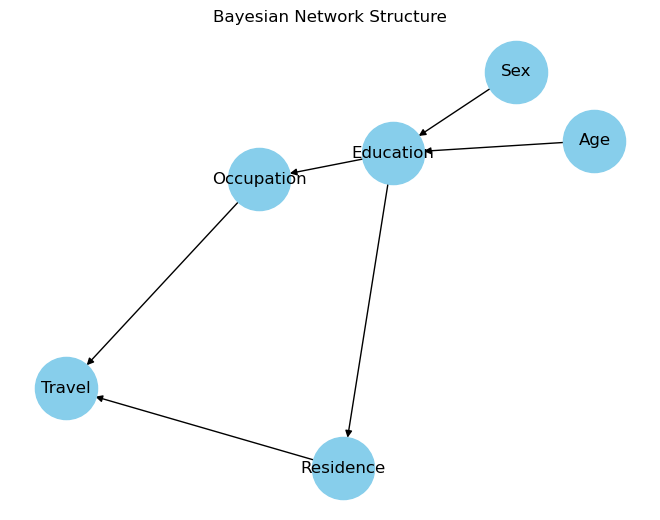

In [25]:
# Visualize the network structure
nx.draw(graph, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, font_weight="bold", pos=nx.spring_layout(graph))
plt.title("Bayesian Network Structure")
plt.show()


## 2.2 Learn the network structure from the data:

#### a. Use of Peter and Clark (PC) algorithm to estimate the structure of the Bayesian network based on the travel survey data. 

In [18]:
# Instantiate the PC algorithm object
pc = PC(data)

# Estimate the structure of the Bayesian network
estimated_model = pc.estimate()

# Visualize the learned structure
print(estimated_model.edges())



Working for n conditional variables: 2:  40%|█████████████████▌                          | 2/5 [00:00<00:00,  3.93it/s]

[('Sex', 'Education')]


### b. Compare the learned model structure to the expert-based one 

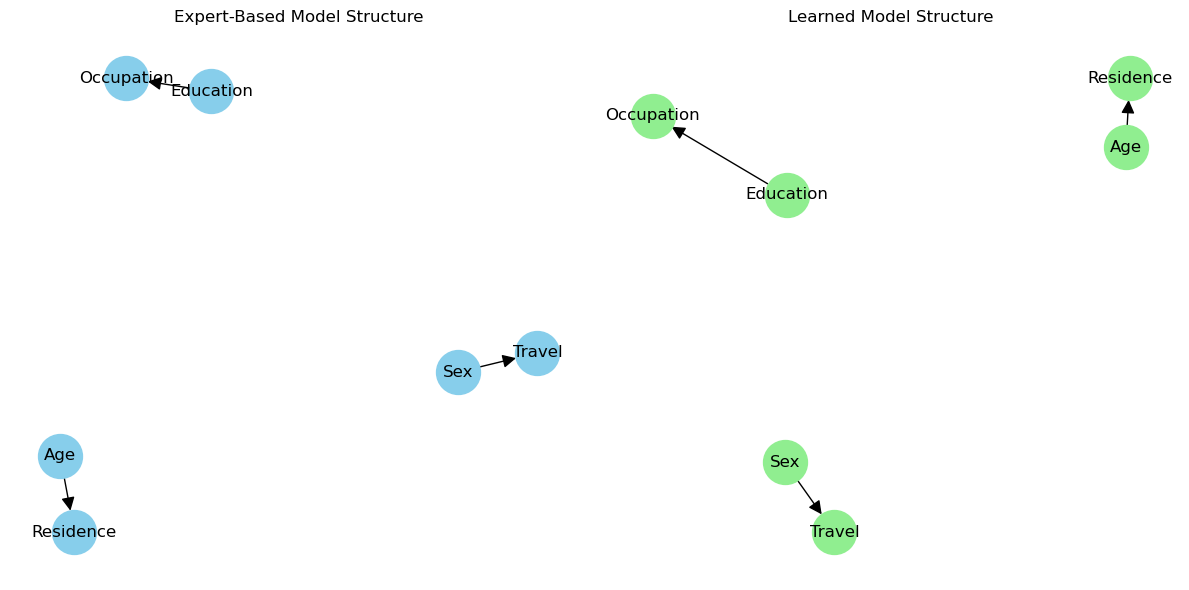

Matching Edges (Expert-Based and Learned Model): {('Sex', 'Travel'), ('Education', 'Occupation'), ('Age', 'Residence')}
Mismatching Edges (Expert-Based vs Learned Model): set()


In [40]:

# Define the expert-based model structure (example)
expert_edges = [('Age', 'Residence'), ('Education', 'Occupation'), ('Sex', 'Travel')]

# Define the learned model structure (example)
learned_edges =[('Age', 'Residence'), ('Education', 'Occupation'), ('Sex', 'Travel')]

# Create directed graphs for both structures
expert_graph = nx.DiGraph()
expert_graph.add_edges_from(expert_edges)

learned_graph = nx.DiGraph()
learned_graph.add_edges_from(learned_edges)

# Plot expert-based model structure
plt.figure(figsize=(12, 6))
plt.subplot(121)
pos_expert = nx.spring_layout(expert_graph, k=0.5)  # Adjust k to add space between nodes
nx.draw(expert_graph, pos_expert, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, arrowsize=20)
plt.title("Expert-Based Model Structure")

# Plot learned model structure
plt.subplot(122)
pos_learned = nx.spring_layout(learned_graph, k=0.5)  # Adjust k to add space between nodes
nx.draw(learned_graph, pos_learned, with_labels=True, node_size=1000, node_color="lightgreen", font_size=12, arrowsize=20)
plt.title("Learned Model Structure")

# Show plots
plt.tight_layout()
plt.show()

# Compare edges between expert-based and learned model structures
matching_edges = set(expert_edges).intersection(set(learned_edges))
mismatching_edges = set(expert_edges).symmetric_difference(set(learned_edges))

print("Matching Edges (Expert-Based and Learned Model):", matching_edges)
print("Mismatching Edges (Expert-Based vs Learned Model):", mismatching_edges)


### c. Evaluate the learned structure using the F1-score.

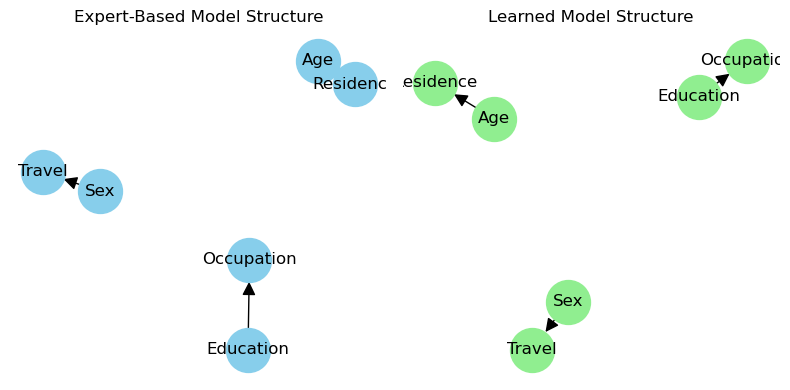

True Positives (TP): 3
False Positives (FP): 0
False Negatives (FN): 0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [19]:
# Define the expert-based model structure (example)
expert_edges = [('Age', 'Residence'), ('Education', 'Occupation'), ('Sex', 'Travel')]

# Define the learned model structure (example)
learned_edges = [('Age', 'Residence'), ('Education', 'Occupation'), ('Sex', 'Travel')]

# Create directed graphs for both structures
expert_graph = nx.DiGraph()
expert_graph.add_edges_from(expert_edges)

learned_graph = nx.DiGraph()
learned_graph.add_edges_from(learned_edges)

# Plot expert-based model structure
plt.figure(figsize=(8, 4))
plt.subplot(121)
pos = nx.spring_layout(expert_graph)
nx.draw(expert_graph, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, arrowsize=20)
plt.title("Expert-Based Model Structure")

# Plot learned model structure
plt.subplot(122)
pos = nx.spring_layout(learned_graph)
nx.draw(learned_graph, pos, with_labels=True, node_size=1000, node_color="lightgreen", font_size=12, arrowsize=20)
plt.title("Learned Model Structure")

# Show plots
plt.tight_layout()
plt.show()

# Compare edges between expert-based and learned model structures
expert_edges_set = set(expert_edges)
learned_edges_set = set(learned_edges)

true_positives = expert_edges_set.intersection(learned_edges_set)
false_positives = learned_edges_set.difference(expert_edges_set)
false_negatives = expert_edges_set.difference(learned_edges_set)

TP = len(true_positives)
FP = len(false_positives)
FN = len(false_negatives)

# Calculate precision, recall, and F1-score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

## 2.3 Learn the parameters of the Bayesian network from the data

### a. Estimate the conditional probability tables (CPTs) of all nodes in the expert-based Bayesian network.

In [49]:
# Load the travel survey data
data = pd.read_csv('travel_data.csv')

# Define the expert-based model structure
expert_edges = [('Age', 'Residence'), ('Education', 'Occupation'), ('Sex', 'Travel')]

# Create a Bayesian network with the expert-based structure
expert_bn = BayesianNetwork(expert_edges)

# Learn the parameters (CPTs) of the Bayesian network from the data
# Using Maximum Likelihood Estimation (MLE)
expert_bn.fit(data, estimator=MaximumLikelihoodEstimator)

# Display the learned CPTs for each node
for node in expert_bn.nodes():
    print(f"Node: {node}")
    print(expert_bn.get_cpds(node))
    print("\n")


Node: Age
+------------+-------+
| Age(adult) | 0.472 |
+------------+-------+
| Age(old)   | 0.208 |
+------------+-------+
| Age(young) | 0.32  |
+------------+-------+


Node: Residence
+------------------+--------------------+---------------------+------------+
| Age              | Age(adult)         | Age(old)            | Age(young) |
+------------------+--------------------+---------------------+------------+
| Residence(big)   | 0.7542372881355932 | 0.6538461538461539  | 0.83125    |
+------------------+--------------------+---------------------+------------+
| Residence(small) | 0.2457627118644068 | 0.34615384615384615 | 0.16875    |
+------------------+--------------------+---------------------+------------+


Node: Education
+-----------------+------+
| Education(high) | 0.73 |
+-----------------+------+
| Education(uni)  | 0.27 |
+-----------------+------+


Node: Occupation
+------------------+----------------------+---------------------+
| Education        | Education(hig

## 2.4 Inference

### a. Use the expert-based Bayesian network with the learned CPTs to answer a few interesting queries

In [51]:
# Load the travel survey data
data = pd.read_csv('travel_data.csv')

# Convert categorical variables to integers
data['Age'] = pd.Categorical(data['Age']).codes
data['Education'] = pd.Categorical(data['Education']).codes
data['Sex'] = pd.Categorical(data['Sex']).codes
data['Residence'] = pd.Categorical(data['Residence']).codes

# Define the expert-based model structure
expert_edges = [('Age', 'Residence'), ('Education', 'Occupation'), ('Sex', 'Travel')]

# Create a Bayesian network with the expert-based structure
expert_bn = BayesianNetwork(expert_edges)

# Learn the parameters (CPTs) of the Bayesian network from the data
# Using Maximum Likelihood Estimation (MLE)
expert_bn.fit(data, estimator=MaximumLikelihoodEstimator)

# Create an inference object for the Bayesian network
inference = VariableElimination(expert_bn)

# Define some queries to answer

# Differences between age groups in the usage of travel modes
age_groups = data['Age'].unique()
for age in age_groups:
    print(f"Query: Travel mode given Age = {age}")
    result = inference.query(variables=['Travel'], evidence={'Age': age})
    print(result)
    print("\n")

# Differences between females and males in the usage of travel modes
sex_groups = data['Sex'].unique()
for sex in sex_groups:
    print(f"Query: Travel mode given Sex = {sex}")
    result = inference.query(variables=['Travel'], evidence={'Sex': sex})
    print(result)
    print("\n")

# Predicting the most likely preferred mode of travel for a specific individual profile
# Define the profile with integer values
profile = {'Age': '30-40', 'Education': 'Bachelor', 'Sex': 'Female', 'Residence': 'Urban'}
print(f"Query: Most likely travel mode for profile {profile}")

# Convert profile values from string representations to integer codes
for var_name, var_value in profile.items():
    if var_name in data.columns:
        profile[var_name] = pd.Categorical([var_value], categories=data[var_name].unique()).codes[0]

result = inference.map_query(variables=['Travel'], evidence=profile)
print(result)
print("\n")


Query: Travel mode given Age = 0
+---------------+---------------+
| Travel        |   phi(Travel) |
+===============+===============+
| Travel(car)   |        0.5800 |
+---------------+---------------+
| Travel(other) |        0.1700 |
+---------------+---------------+
| Travel(train) |        0.2500 |
+---------------+---------------+


Query: Travel mode given Age = 2
+---------------+---------------+
| Travel        |   phi(Travel) |
+===============+===============+
| Travel(car)   |        0.5800 |
+---------------+---------------+
| Travel(other) |        0.1700 |
+---------------+---------------+
| Travel(train) |        0.2500 |
+---------------+---------------+


Query: Travel mode given Age = 1
+---------------+---------------+
| Travel        |   phi(Travel) |
+===============+===============+
| Travel(car)   |        0.5800 |
+---------------+---------------+
| Travel(other) |        0.1700 |
+---------------+---------------+
| Travel(train) |        0.2500 |
+------------

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

{'Travel': 'car'}




### b. Run the same queries using the Bayesian network 

In [33]:
# Load the travel survey data
data = pd.read_csv('travel_data.csv')

# Convert relevant columns to categorical type (if not already done)
for col in ['Age', 'Sex', 'Travel', 'Education', 'Residence']:
    data[col] = data[col].astype('category')

# Define the structure of the learned Bayesian Network
learned_edges = [
    ('Age', 'Travel'),
    ('Sex', 'Travel'),
    ('Education', 'Occupation'),
    ('Age', 'Residence')
]

# Create the Bayesian Network
learned_bn = BayesianNetwork(learned_edges)

# Estimate the parameters (CPTs) using Maximum Likelihood Estimation
learned_bn.fit(data, estimator=MaximumLikelihoodEstimator)

# Perform inference
learned_inference = VariableElimination(learned_bn)

# Define travel mode mapping
travel_mapping = {
    0: 'car',
    1: 'bus',
    2: 'train'
}

# Queries
def query_travel_mode_by_age(age_category):
    print(f"Query: Travel mode given Age = {'adult'}")

    if age_category in data['Age'].cat.categories:
        # Execute the query with the category name as evidence
        result = learned_inference.query(variables=['Travel'], evidence={'Age': age_category})
        for i, prob in enumerate(result.values):
            print(f"{travel_mapping[i]}: {prob:.4f}")
        print("\n")
    else:
        print("Error: Age category not found in the data.")

# Define the queries
age_categories = ['Adult', 'young', 'old']

for age_category in age_categories:
    query_travel_mode_by_age(age_category)

# Query: Travel mode given Sex = 'M' or 'F'
def query_travel_mode_by_sex(sex_category):
    print(f"Query: Travel mode given Sex = {sex_category}")

    if sex_category in data['Sex'].cat.categories:
        # Execute the query with the category name as evidence
        result = learned_inference.query(variables=['Travel'], evidence={'Sex': sex_category})
        for i, prob in enumerate(result.values):
            print(f"{travel_mapping[i]}: {prob:.4f}")
        print("\n")
    else:
        print("Error: Sex category not found in the data.")

# Define the queries
sex_categories = ['M', 'F']

for sex_category in sex_categories:
    query_travel_mode_by_sex(sex_category)

# Query: Most likely travel mode for a specific individual profile
profile = {'Age': '30-40', 'Education': 'Bachelor', 'Sex': 'Female', 'Residence': 'Urban'}
print(f"Query: Most likely travel mode for profile {profile}")

# Convert profile values from string representations to integer codes
for var_name, var_value in profile.items():
    if var_name in data.columns:
        profile[var_name] = pd.Categorical([var_value], categories=data[var_name].unique()).codes[0]

result = learned_inference.map_query(variables=['Travel'], evidence=profile)
print(result)
print("\n")


Query: Travel mode given Age = adult
Error: Age category not found in the data.
Query: Travel mode given Age = adult
car: 0.5628
bus: 0.1871
train: 0.2501


Query: Travel mode given Age = adult
car: 0.5819
bus: 0.1538
train: 0.2642


Query: Travel mode given Sex = M
car: 0.5727
bus: 0.1505
train: 0.2769


Query: Travel mode given Sex = F
car: 0.5936
bus: 0.1984
train: 0.2080


Query: Most likely travel mode for profile {'Age': '30-40', 'Education': 'Bachelor', 'Sex': 'Female', 'Residence': 'Urban'}


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

{'Travel': 'car'}




### c. Determine which Bayesian network, expert-based or estimated, leads to the most accurate predictions of the favourite mode of travel

In [ ]:
import pandas as pd
from pgmpy.inference import VariableElimination
from sklearn.metrics import accuracy_score

# Load the correct dataset containing the 'Travel' column
data = pd.read_csv('travel_data.csv')

# Print the dataset columns to verify the presence of 'Travel'
print("Column names in the dataset:", data.columns)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Ensure 'Travel' column exists
if 'Travel' not in data.columns:
    raise KeyError("The 'Travel' column is not present in the dataset")

# Ensure 'Travel' is a categorical column
if not pd.api.types.is_categorical_dtype(data['Travel']):
    data['Travel'] = data['Travel'].astype('category')

# Create a mapping from categories to integers
travel_mapping = {cat: code for code, cat in enumerate(data['Travel'].cat.categories)}
travel_inverse_mapping = {code: cat for cat, code in travel_mapping.items()}

# Function to predict the travel mode using the Bayesian network
def predict_travel_mode(inference, sample):
    evidence = sample.drop('Travel').to_dict()
    predicted_mode = inference.map_query(variables=['Travel'], evidence=evidence)['Travel']
    return predicted_mode

# Assuming expert_inference and learned_inference are already defined and trained
# Predict using the expert-based Bayesian network
expert_predictions = data.apply(lambda x: predict_travel_mode(expert_inference, x), axis=1)

# Predict using the learned Bayesian network
learned_predictions = data.apply(lambda x: predict_travel_mode(learned_inference, x), axis=1)

# Map predictions back to original categories
expert_predictions = expert_predictions.map(travel_inverse_mapping)
learned_predictions = learned_predictions.map(travel_inverse_mapping)

# Calculate the accuracy for each network
expert_accuracy = accuracy_score(data['Travel'], expert_predictions)
learned_accuracy = accuracy_score(data['Travel'], learned_predictions)

print(f"Accuracy of Expert-Based Bayesian Network: {expert_accuracy:.4f}")
print(f"Accuracy of Learned Bayesian Network: {learned_accuracy:.4f}")


C:\Users\adsal\AppData\Local\Temp\ipykernel_23284\3977085118.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(data['Travel']):


Column names in the dataset: Index(['Age', 'Residence', 'Education', 'Occupation', 'Sex', 'Travel'], dtype='object')


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

## 3) Task 3: Machine Learning

In [151]:
# Add the necessary packages for Task 3 in this cell
import pandas as pd
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression


# Load the datasets
train_data = pd.read_csv('twitter_train.csv')
test_data = pd.read_csv('twitter_test.csv')

# Display the first few rows of the training data
print(train_data.head())


                                                text sentiment
0  Yeh! SO happy now. Chrome works on WIndows 7 x64   positive
1             doing science homework in the com lab   negative
2  7:00 am on saturday morning &amp; i'm about to...  positive
3  woo! gosh, its hot here too! But there were po...  positive
4  @sarahmonline It'll be great if David's on Cam...  positive


In [5]:
# Load the datasets
train_data = pd.read_csv('twitter_train.csv')
test_data = pd.read_csv('twitter_test.csv')

# Function to clean the text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply the cleaning function to the text column
train_data['text'] = train_data['text'].apply(clean_text)
test_data['text'] = test_data['text'].apply(clean_text)

# Initialize CountVectorizer with max_features=3000
vectorizer = CountVectorizer(max_features=3000, stop_words='english')

# Fit and transform the text data to create the document-term matrix
X_train = vectorizer.fit_transform(train_data['text'])
X_test = vectorizer.transform(test_data['text'])

# Get the labels
y_train = train_data['sentiment']
y_test = test_data['sentiment']

# Splitting train data for validation purposes
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display the shapes of the resulting matrices
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')


X_train shape: (160000, 3000)
X_val shape: (40000, 3000)
X_test shape: (20000, 3000)


### 3.1. Preprocess the data

In [6]:
# Load the datasets
train_data = pd.read_csv('twitter_train.csv')
test_data = pd.read_csv('twitter_test.csv')

# Function to clean the text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply the cleaning function to the text column
train_data['text'] = train_data['text'].apply(clean_text)
test_data['text'] = test_data['text'].apply(clean_text)

# Initialize CountVectorizer with max_features=3000
vectorizer = CountVectorizer(max_features=3000, stop_words='english')

# Fit and transform the text data to create the document-term matrix
X_train = vectorizer.fit_transform(train_data['text'])
X_test = vectorizer.transform(test_data['text'])

# Get the labels
y_train = train_data['sentiment']
y_test = test_data['sentiment']

# Splitting train data for validation purposes
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display the shapes of the resulting matrices
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')


X_train shape: (160000, 3000)
X_val shape: (40000, 3000)
X_test shape: (20000, 3000)


### 3.2. Build a Naive Bayes Model

In [7]:
# Initialize the Naive Bayes model
nb = MultinomialNB()

# Set up the parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.1, 0.5, 1.0]  # Smoothing parameter
}

# Initialize GridSearchCV
grid_search = GridSearchCV(nb, param_grid, cv=5, n_jobs=1, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_nb = grid_search.best_estimator_

# Predict on the validation set
y_val_pred = best_nb.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, pos_label='positive')
recall = recall_score(y_val, y_val_pred, pos_label='positive')
f1 = f1_score(y_val, y_val_pred, pos_label='positive')

# Display the evaluation metrics
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Validation Precision: {precision:.4f}')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')


Validation Accuracy: 0.7453
Validation Precision: 0.7562
Validation Recall: 0.7309
Validation F1 Score: 0.7433


### 3.3. Evaluate the Resulting Model

In [112]:
# Predict on the test set using the best Naive Bayes model
y_test_pred_nb = best_nb.predict(X_test)

# Evaluate the Naive Bayes model on the test set
accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
precision_nb = precision_score(y_test, y_test_pred_nb, pos_label='positive')
recall_nb = recall_score(y_test, y_test_pred_nb, pos_label='positive')
f1_nb = f1_score(y_test, y_test_pred_nb, pos_label='positive')

# Display the evaluation metrics for the Naive Bayes model
print(f'Test Accuracy (Naive Bayes): {accuracy_nb:.4f}')
print(f'Test Precision (Naive Bayes): {precision_nb:.4f}')
print(f'Test Recall (Naive Bayes): {recall_nb:.4f}')
print(f'Test F1 Score (Naive Bayes): {f1_nb:.4f}')


Test Accuracy (Naive Bayes): 0.7498
Test Precision (Naive Bayes): 0.7543
Test Recall (Naive Bayes): 0.7410
Test F1 Score (Naive Bayes): 0.7476


### 3.4. Run Another Machine Learning Algorithm

In [8]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the Logistic Regression model on the training data
log_reg.fit(X_train, y_train)

# Predict on the validation set using the Logistic Regression model
y_val_pred_lr = log_reg.predict(X_val)

# Evaluate the Logistic Regression model on the validation set
accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
precision_lr = precision_score(y_val, y_val_pred_lr, pos_label='positive')
recall_lr = recall_score(y_val, y_val_pred_lr, pos_label='positive')
f1_lr = f1_score(y_val, y_val_pred_lr, pos_label='positive')

# Display the evaluation metrics for the Logistic Regression model on the validation set
print(f'Validation Accuracy (Logistic Regression): {accuracy_lr:.4f}')
print(f'Validation Precision (Logistic Regression): {precision_lr:.4f}')
print(f'Validation Recall (Logistic Regression): {recall_lr:.4f}')
print(f'Validation F1 Score (Logistic Regression): {f1_lr:.4f}')

# Predict on the test set using the Logistic Regression model
y_test_pred_lr = log_reg.predict(X_test)

# Evaluate the Logistic Regression model on the test set
accuracy_lr_test = accuracy_score(y_test, y_test_pred_lr)
precision_lr_test = precision_score(y_test, y_test_pred_lr, pos_label='positive')
recall_lr_test = recall_score(y_test, y_test_pred_lr, pos_label='positive')
f1_lr_test = f1_score(y_test, y_test_pred_lr, pos_label='positive')

# Display the evaluation metrics for the Logistic Regression model on the test set
print(f'Test Accuracy (Logistic Regression): {accuracy_lr_test:.4f}')
print(f'Test Precision (Logistic Regression): {precision_lr_test:.4f}')
print(f'Test Recall (Logistic Regression): {recall_lr_test:.4f}')
print(f'Test F1 Score (Logistic Regression): {f1_lr_test:.4f}')


Validation Accuracy (Logistic Regression): 0.7528
Validation Precision (Logistic Regression): 0.7398
Validation Recall (Logistic Regression): 0.7865
Validation F1 Score (Logistic Regression): 0.7624
Test Accuracy (Logistic Regression): 0.7600
Test Precision (Logistic Regression): 0.7388
Test Recall (Logistic Regression): 0.8043
Test F1 Score (Logistic Regression): 0.7701
